<a href="https://colab.research.google.com/github/gustavo-candidoo/data-science/blob/main/Regress%C3%A3o_Linear_SM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Bibliotecas


In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Importando o dataset

In [22]:
df = pd.read_csv("https://raw.githubusercontent.com/gustavo-candidoo/data-science/main/regressao%20linear/base_funcionarios_v3%20.csv")

### Conhecendo o dataset

In [23]:
df.head()

,Unnamed: 0,Salario,Anos_Educ_Superior,Tempo_Empresa,Tempo_de_Carreira
0,0,5517.4,3,3,9.777079
1,1,6399.9,4,6,3.765998
2,2,6206.7,6,3,7.926264
3,3,6060.6,4,5,2.233497
4,4,6122.7,2,9,26.821842


In [24]:
df = df.drop(columns=['Unnamed: 0', 'Tempo_Empresa', 'Tempo_de_Carreira'])
df.head()

,Salario,Anos_Educ_Superior
0,5517.4,3
1,6399.9,4
2,6206.7,6
3,6060.6,4
4,6122.7,2


In [25]:
df.dtypes

Salario               float64
Anos_Educ_Superior      int64
dtype: object

In [26]:
shape = df.shape
print(f"O dataset possui {shape[0]} linhas e {shape[1]} colunas.")

O dataset possui 46 linhas e 2 colunas.


### Análise exploratória

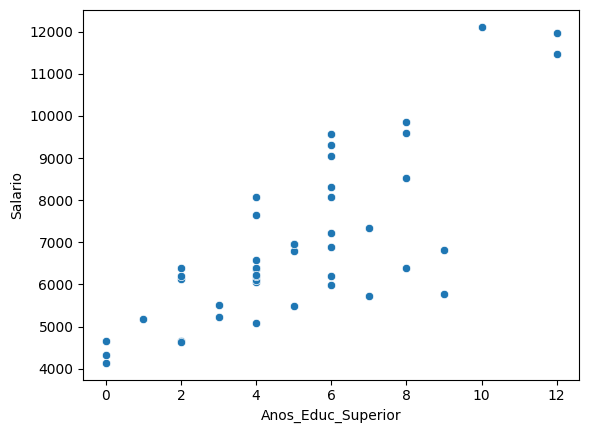

In [27]:
sns.scatterplot(x = df['Anos_Educ_Superior'],
                y = df['Salario'])
plt.show()

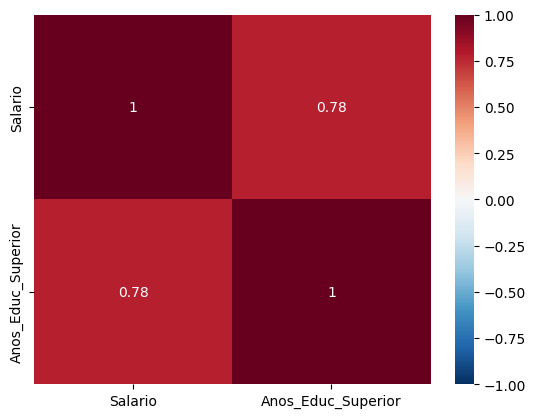

In [28]:
sns.heatmap(df.corr(),
            cmap='RdBu_r',
            vmin=-1, vmax=1,
            annot=True)
plt.show()

### Regressão utilizando o StatsModel

In [29]:
import statsmodels.api as sm

# Target
y = df['Salario']

# Features e Intercepto
df['intercepto'] = 1
X = df[['intercepto', 'Anos_Educ_Superior']]

In [30]:
modelo = sm.OLS(y, X)
resultado = modelo.fit()

In [31]:
print(resultado.summary())

                            OLS Regression Results                            
Dep. Variable:                Salario   R-squared:                       0.604
Model:                            OLS   Adj. R-squared:                  0.595
Method:                 Least Squares   F-statistic:                     67.03
Date:                Sun, 10 Sep 2023   Prob (F-statistic):           2.18e-10
Time:                        01:43:01   Log-Likelihood:                -391.36
No. Observations:                  46   AIC:                             786.7
Df Residuals:                      44   BIC:                             790.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
intercepto          4301.7990    372

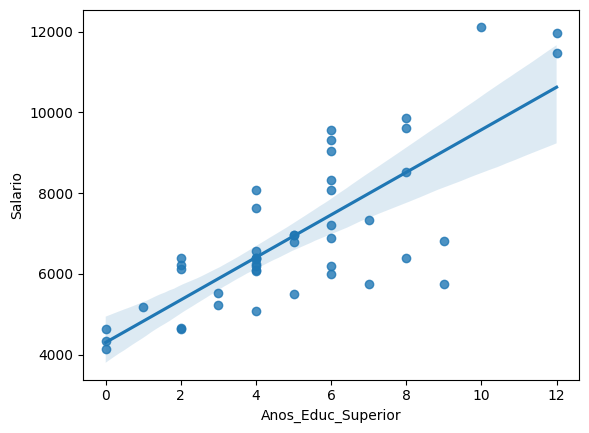

In [32]:
sns.regplot(data = df,
            x = 'Anos_Educ_Superior',
            y = 'Salario')
plt.show()